# Visualizations
This notebook is dedicated to produce outputs and visualizations for the presentation and the paper.

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from custom import load_img, show, show_bands, minmax_img, show_hist

histos   = pd.read_csv('dataset/dev_hist.csv', header=[0,1], index_col=[0,1])
metadata = pd.read_csv('dataset/metadata.csv', index_col=['src','slice_num'])

We load two samples of images, one contains a glacier and the other does not:

In [3]:
glac    = load_img(metadata.loc[3,56].img_slice)
no_glac = load_img(metadata.loc[7,94].img_slice)
glac_mask    = load_img(metadata.loc[3,56].mask_slice, minmax=False)
no_glac_mask = load_img(metadata.loc[7,94].mask_slice, minmax=False)
glac_hist = histos.loc[3,56]
no_glac_hist = histos.loc[7,94]

A glacier image and its mask

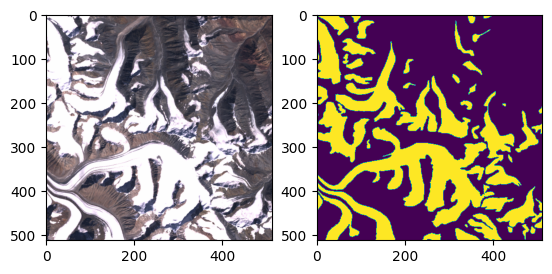

In [4]:
plt.subplot(1,2,1)
show(glac, kind='RGB')  
plt.subplot(1,2,2)
show(glac_mask, kind=[0])
plt.show()

A non glacier image and its mask

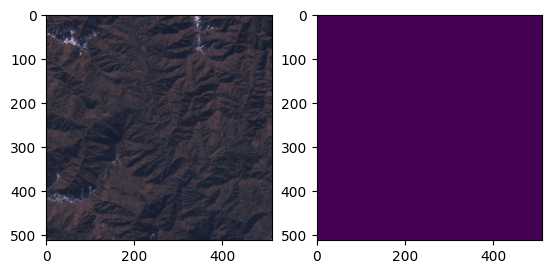

In [5]:
plt.subplot(1,2,1)
show(no_glac, kind='RGB')  
plt.subplot(1,2,2)
show(no_glac_mask, kind=[0])
plt.show()

A mask of a glacier and all the considered combinations of bands

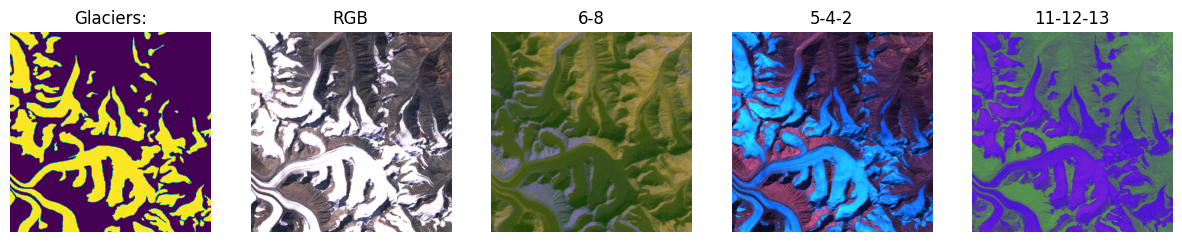

In [6]:
plt.figure(figsize=(15,20))
show_bands(glac, glac_mask)

A mask of a NON glacier and all the considered combinations of bands

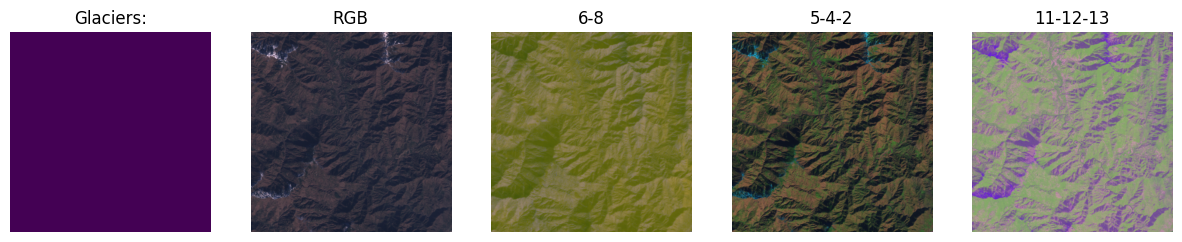

In [7]:
plt.figure(figsize=(15,20))
show_bands(no_glac, no_glac_mask)

An image and its color histogram

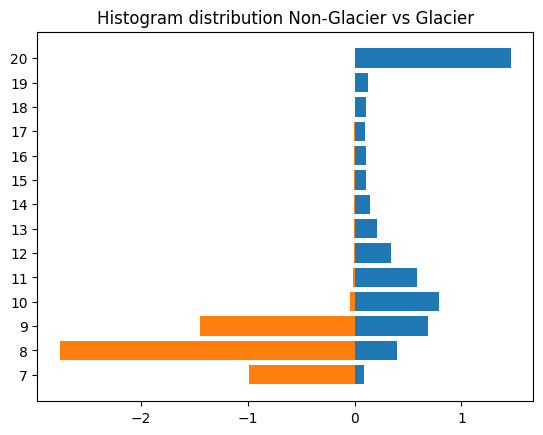

In [8]:
red_no = no_glac_hist.loc['LE7 B2 (green)']
red = glac_hist.loc['LE7 B2 (green)']
red = red[red!=0]
red_no = red_no[red_no!=0]
plt.barh(y=red.index, width=red, align='center')
plt.barh(y=red_no.index, width=-red_no, align='center')
plt.title('Histogram distribution Non-Glacier vs Glacier')
plt.show()

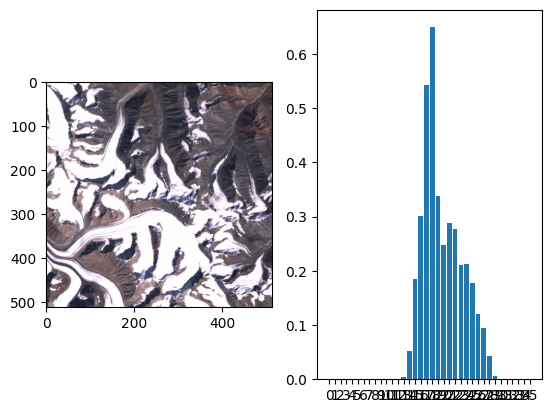

In [17]:
show_hist(glac, glac_hist, channel=5)